In [101]:
# Import Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

In [2]:
#!pip install xlrd==1.2.0

In [3]:
# !pip install openpyxl

In [4]:
# os.getcwd()

In [5]:
# Import Data
data = pd.read_excel('../raw_data/data_siniestros.xlsx', engine = 'openpyxl')

In [6]:
data.head()

,SINIESTRO,ESTATUS,RAMOID,ENFERMEDAD,TIPO_SIN,TP_PROVEEDOR,ESTADO,SEXO,EDAD,CD_PAIS,MONTO USD,FECHA CONTITUCION,Rango Edad,Hospitalizacion-Ambulatorio
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


In [18]:
data = data.rename(columns={'SINIESTRO': 'claim', 'ESTATUS': 'status', 'RAMOID': 'insurance_type', 'ENFERMEDAD': 'disease'\
                            ,'TIPO_SIN':'claim_type', 'TP_PROVEEDOR': 'provider_type', 'ESTADO':'state','SEXO':'sex'\
                            ,'year':'age','CD_PAIS':'country_id', 'MONTO USD':'amount', 'FECHA CONTITUCION': 'date_issue'\
                            ,'Rango Edad':'age_range', 'Hospitalizacion-Ambulatorio': 'hospitalization/outpatient'})

In [19]:
data

,claim,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,hospitalization/outpatient
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183614,183615,PAGADO,COLECTIVO,Hiperplasia De La Prostata,CARTA AVAL,CLINICA,Distrito Capital,M,81,29,8425,2021-02-04,Mayor a 70,Hospitalización
183615,183616,PAGADO,COLECTIVO,Tumor Maligno De Los Bronquios Y Del Pulmon,EMERGENCIA,CLINICA,Distrito Capital,F,64,29,2000,2021-02-08,60-69,Hospitalización
183616,183617,PAGADO,COLECTIVO,Fractura A Nivel De La Muñeca Y De La Mano,EMERGENCIA,CLINICA,Distrito Capital,F,51,29,7131,2021-02-10,50-59,Hospitalización
183617,183618,PAGADO,INDIVIDUAL,Enfermedad De Valvulas Cardiacas:Mitral-Aortic...,CARTA AVAL,COMPRAS Y SUMINISTROS,Estado No Identificado,M,67,15,36665,2019-07-22,60-69,Ambulatorio


In [20]:
#Data Descripcion

In [21]:
data.size

2570666

In [23]:
data.dtypes

claim                                  int64
status                                object
insurance_type                        object
disease                               object
claim_type                            object
provider_type                         object
state                                 object
sex                                   object
age                                    int64
country_id                             int64
amount                                 int64
date_issue                    datetime64[ns]
age_range                             object
hospitalization/outpatient            object
dtype: object

In [24]:
data.describe()

,claim,age,country_id,amount
count,183619.000000,183619.000000,183619.000000,1.836190e+05
mean,91810.000000,44.501506,27.801017,1.443752e+04
std,53006.383877,22.409870,5.810547,3.253159e+05
min,1.000000,0.000000,1.000000,0.000000e+00
25%,45905.500000,30.000000,29.000000,2.200000e+01
50%,91810.000000,46.000000,29.000000,8.500000e+01
75%,137714.500000,62.000000,29.000000,4.100000e+02
max,183619.000000,100.000000,100.000000,6.317898e+07


In [67]:
data_days = data.groupby('date_issue', as_index = False).agg({'amount': 'sum'})
data_days.columns = ['date_issue','total_amount_claims']

In [68]:
data_days

,date_issue,total_amount_claims
0,2017-01-01,57703
1,2017-01-02,835522
2,2017-01-03,244917
3,2017-01-04,765181
4,2017-01-05,554370
...,...,...
1520,2021-03-04,356986
1521,2021-03-05,293427
1522,2021-03-06,338578
1523,2021-03-07,142591


<AxesSubplot:xlabel='total_amount_claims', ylabel='date_issue'>

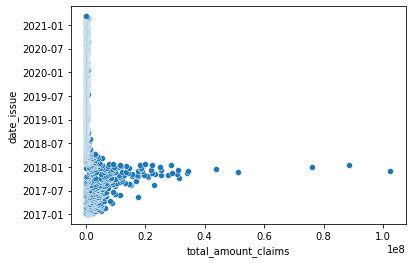

In [58]:
sns.scatterplot(x="total_amount_claims", y="date_issue", data=data_days)

In [69]:
data_days.set_index('date_issue', inplace=True)

In [70]:
data_days

,total_amount_claims
date_issue,
2017-01-01,57703
2017-01-02,835522
2017-01-03,244917
2017-01-04,765181
2017-01-05,554370
...,...
2021-03-04,356986
2021-03-05,293427
2021-03-06,338578


<AxesSubplot:xlabel='date_issue'>

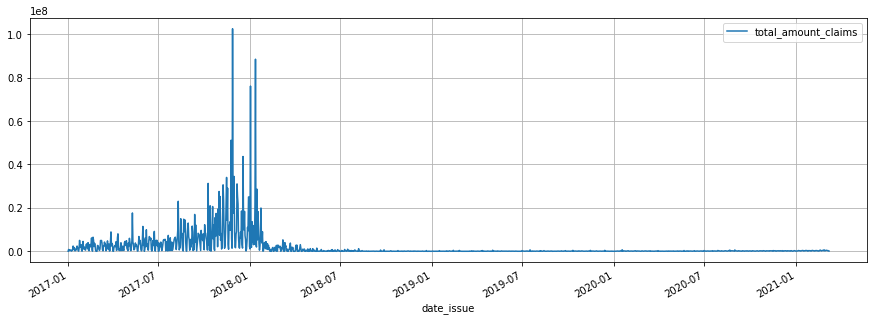

In [71]:
data_days.plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='date_issue'>

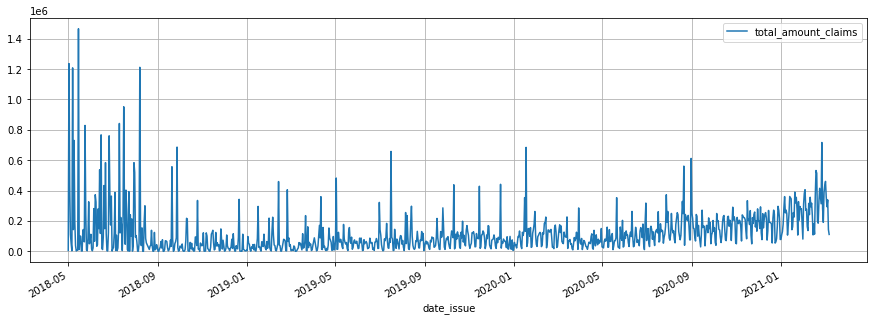

In [89]:
start_date = datetime(2018, 5, 1)
end_date = datetime(2021, 3, 8)
date_filter = (data_days.index >= start_date) & (data_days.index <= end_date)
data_days[date_filter].plot(grid=True, figsize=(15,5),  )

<AxesSubplot:xlabel='date_issue'>

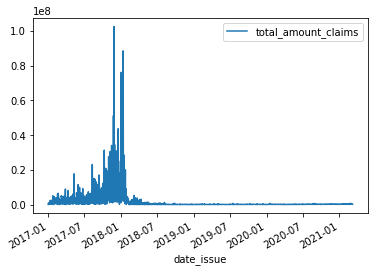

In [84]:
data_days.plot()